In [1]:
import sys

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import torch
from scipy.io import mmread
import scipy as sci
from scipy import sparse
import anndata
import json
import telegraph as tg
import tangram as tan
import tangram2 as tan2

%load_ext autoreload
%autoreload 2
%matplotlib inline


In [3]:
from telegraph.methods.workflows import Workflow

In [4]:
from sklearn.metrics import jaccard_score
from scipy.spatial import distance


In [5]:
path = '/gstore/data/resbioai/tangram2_data/telegraph/res/ccc_data/original_dataset/'

In [6]:
ad_sc = sc.read_h5ad(path + 'scc_new.h5ad')
#ad_sc = ad_sc[ad_sc.obs['celltype_major'] != 'Normal Epithelial']

In [7]:
patient_group = ['P2', 'P4', 'P5', 'P6', 'P9', 'P10']#  'P4','P10' 'P5',

In [8]:
result = []
for i in range(len(patient_group)):
    patient = patient_group[i]
    result.append(pd.read_csv('/gstore/data/resbioai/tangram2_data/telegraph/res/mapping/200_spot/' 
                           + patient + '_result.csv', index_col = 0)) # here we can sepcifiy the number of spots we want
    # else:
    #     result_df = pd.concat([result_df, ])
result_df = pd.concat(result)

In [9]:
result_df['feature'] = result_df.index

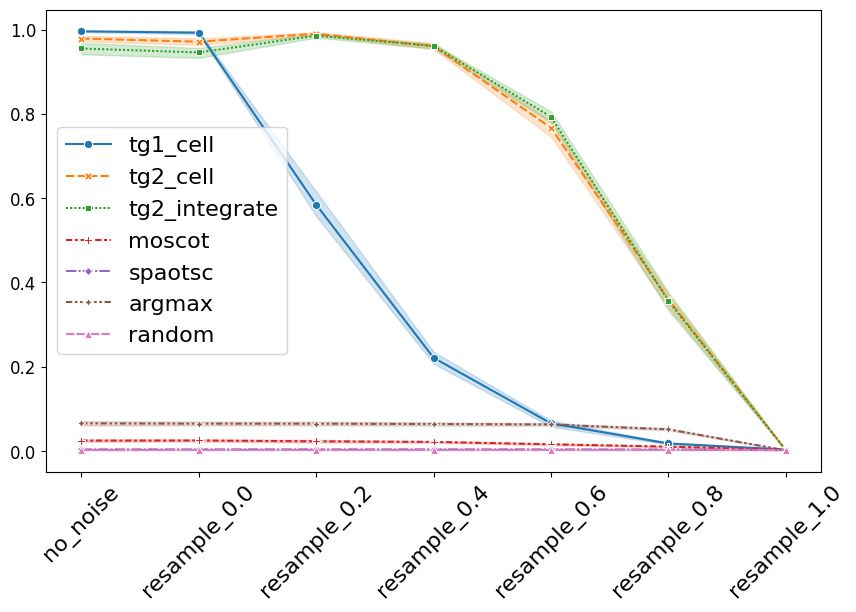

In [12]:
plt.figure(figsize=(10,6))
sns.lineplot(result_df, markers=True)
plt.xticks(rotation = 45, fontsize = '16')
plt.yticks(fontsize = '12')
plt.legend( fontsize="16",)
#plt.savefig('mapping.png', dpi = 300,  bbox_inches='tight')

In [14]:
patient_group = ['P2', 'P4', 'P6', 'P9', ]# 'P5', 'P10',
num_spots = [100, 200, 300, 500,]
method = ['tg2_cell']# ['tg1_cell', 'tg2_cell']

In [15]:
result_spot = pd.DataFrame()
for num in num_spots:
    #result_spot[str(num) + '_spots'] = np.nan
    result = []
    corrected_group = patient_group.copy()
    # if num >200:
    #     corrected_group.remove('P5')
    # if num >300:
    #     corrected_group.remove('P10')
    if num >1000:
        corrected_group = ['all']
        
    for i in range(len(corrected_group)):
        patient = corrected_group[i]
        temp = pd.read_csv('/gstore/data/resbioai/tangram2_data/telegraph/res/mapping/' + str(num) + '_spot/' 
                               + patient + '_result.csv', index_col = 0)

        temp['feature'] = temp.index.copy()
        #temp.index=patient + '_' + temp.index

        result.append(temp)
    result_df = pd.concat(result)
    # result_df['feature'] = result_df.index
    if num == 100:
        result_spot.index = result_df.index
    result_spot[str(num) + '_spots'] = result_df[method]
#    result_spot['feature'] = result_df['feature']
    

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'no_noise'),
  Text(1, 0, 'resample_0.0'),
  Text(2, 0, 'resample_0.2'),
  Text(3, 0, 'resample_0.4'),
  Text(4, 0, 'resample_0.6'),
  Text(5, 0, 'resample_0.8'),
  Text(6, 0, 'resample_1.0')])

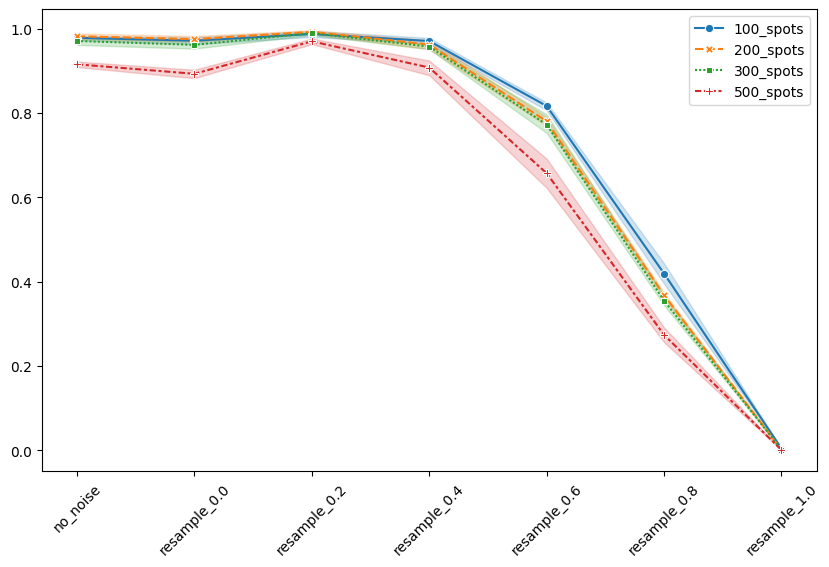

In [16]:
plt.figure(figsize=(10,6))
sns.lineplot(result_spot, markers=True)
plt.xticks(rotation = 45)